## Rule 90 in Cirq

In this example we will build circuit for Elementary Cellular Automaton given by Rule 90 and simulate it on (Clifford) quantum simulator.

First, let's simulate state with only one bit set for different number of iterations. To create initial state, we act with X gate on qubit which represnts that bit.

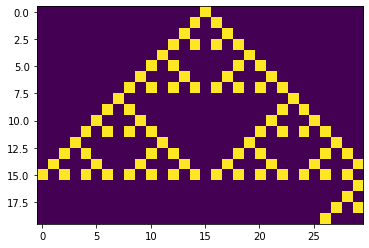

In [1]:
import cirq
from matplotlib import pyplot as plt
from quantum_eca import circuit_for_eca, ECA, BorderCondition

N = 30
max_steps = 20

qubits = cirq.LineQubit.range(N)
results = []
ca = ECA(90, BorderCondition.FIXED)

for steps in range(max_steps):
    circuit = cirq.Circuit()
    circuit += cirq.X(qubits[N//2])
    for i in range(steps):
        circuit += circuit_for_eca(ca, qubits)
    circuit += [cirq.measure(q) for q in qubits]
    sim = cirq.CliffordSimulator()    
    result = sim.simulate(circuit).measurements
    results.append([result[str(i)][0] for i in range(N)])
    
plt.imshow(results)

## Simulating superposition of states

Let's demonstrate that using quantum computer we can evolve multiple states at the same state, by evolvoing superposition of them. Let's take N=10 and consider two states - where only 4-th bit is set and only 5-th qubit is set. let's build superposition of this states, wach with coefficient $\frac{1}{\sqrt{2}}$ and apply  5 times circuit for Rule 90.

In [2]:
qubits = cirq.LineQubit.range(10)
circuit = cirq.Circuit()
circuit += cirq.H(qubits[4])
circuit += cirq.CNOT(qubits[4], qubits[5])
circuit += cirq.X(qubits[5])
for i in range(5):
    circuit += circuit_for_eca(ca, qubits)
    
sim = cirq.CliffordSimulator()    
result = sim.simulate(circuit).final_state
print(result)

0.71|0100000101⟩ + 0.71|1010000010⟩


As expected, final state is superposition of 2 states, each of which is result of evolution of corresponding initial state for 5 steps.